Kaggle Dataset: Customer Segmentation

https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering/data

Exploratory Data Analysis

In [1]:
from utils import load_data

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = load_data()

print(data.shape)

data.head(5)

Path to dataset files: C:\Users\sunsh\.cache\kagglehub\datasets\vishakhdapat\customer-segmentation-clustering\versions\1
(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# Data cleaning
# Check for missing values
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
data = data.dropna().reset_index(drop=True)
print(data.shape)
# Check for missing values again
data.isnull().sum()

(2216, 29)


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

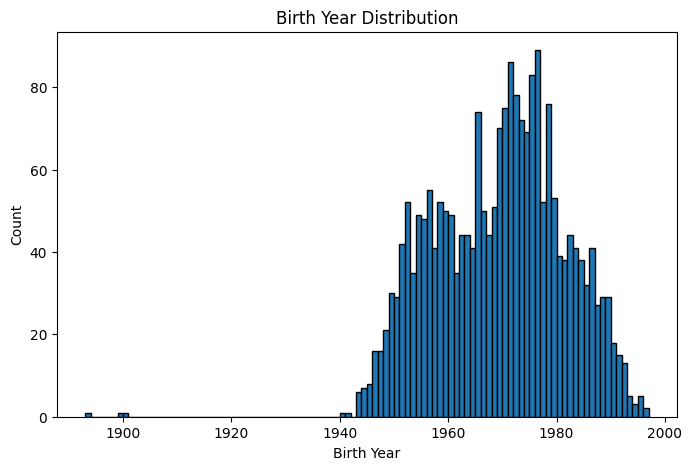

In [5]:
# Distribution of Birth Year

plt.figure(figsize=(8, 5))
plt.hist(data['Year_Birth'], bins=range(min(data['Year_Birth']), max(data['Year_Birth']) + 2), edgecolor='black')
plt.title('Birth Year Distribution')
plt.xlabel('Birth Year')
plt.ylabel('Count')
plt.show()

In [6]:
# Remove outliers
data = data[data['Year_Birth'] >= 1940]
print(data.shape)

(2213, 29)


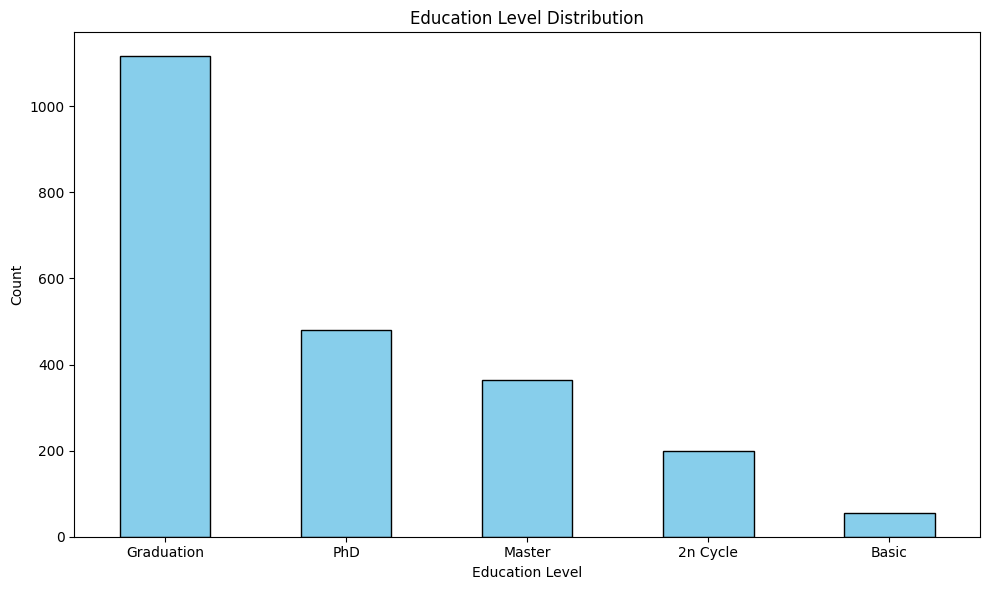

In [7]:
# Get counts of each education level
education_counts = data['Education'].value_counts()

plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

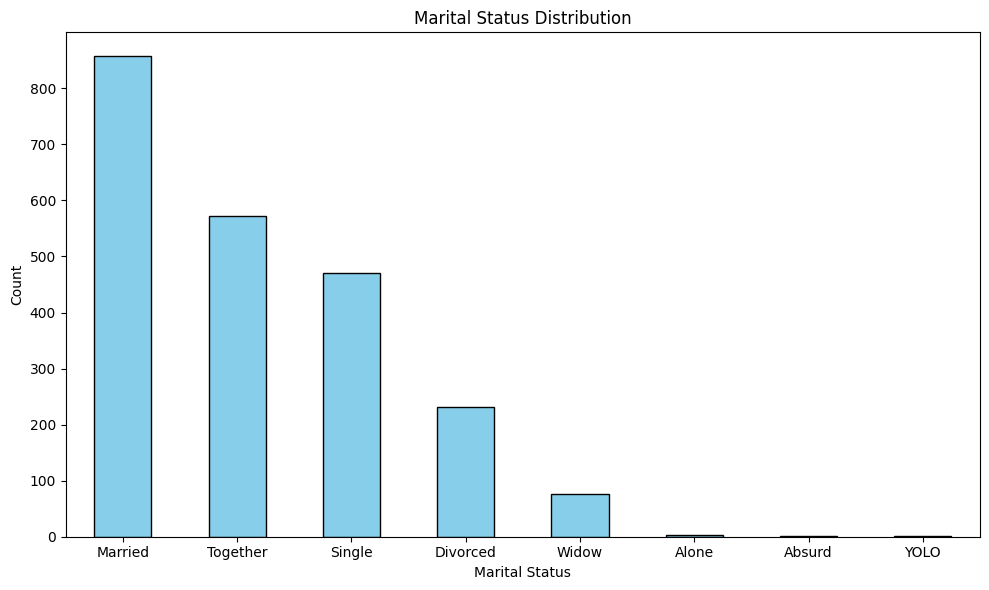

In [8]:
# Get counts of each marital status
marital_counts = data['Marital_Status'].value_counts()

plt.figure(figsize=(10, 6))
marital_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

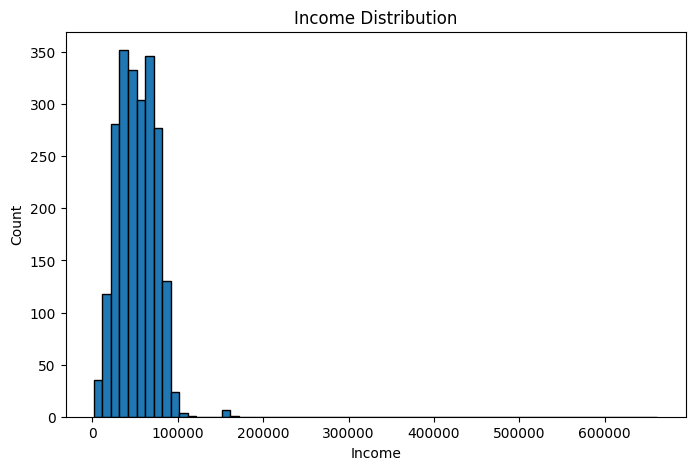

In [9]:
data['Income'] = data['Income'].round().astype(int)

# Distribution of income

plt.figure(figsize=(8, 5))
plt.hist(data['Income'], bins=range(min(data['Income']), max(data['Income']) + 2, 10000), edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

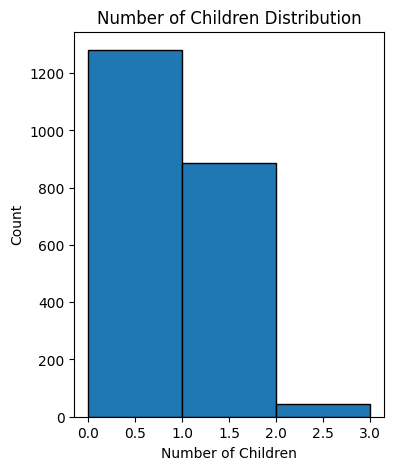

In [10]:
# Distribution of number of young children

plt.figure(figsize=(4, 5))
plt.hist(data['Kidhome'], bins=range(min(data['Kidhome']), max(data['Kidhome']) + 2), edgecolor='black')
plt.title('Number of Children Distribution')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

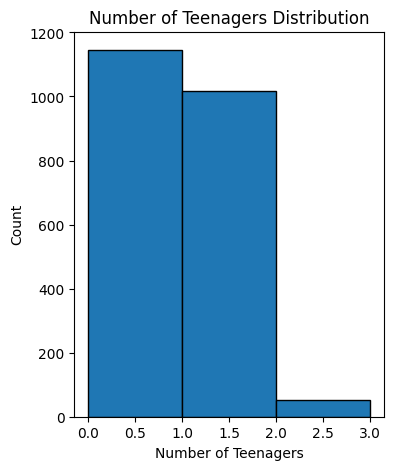

In [11]:
# Distribution of number of teenagers

plt.figure(figsize=(4, 5))
plt.hist(data['Teenhome'], bins=range(min(data['Teenhome']), max(data['Teenhome']) + 2), edgecolor='black')
plt.title('Number of Teenagers Distribution')
plt.xlabel('Number of Teenagers')
plt.ylabel('Count')
plt.show()

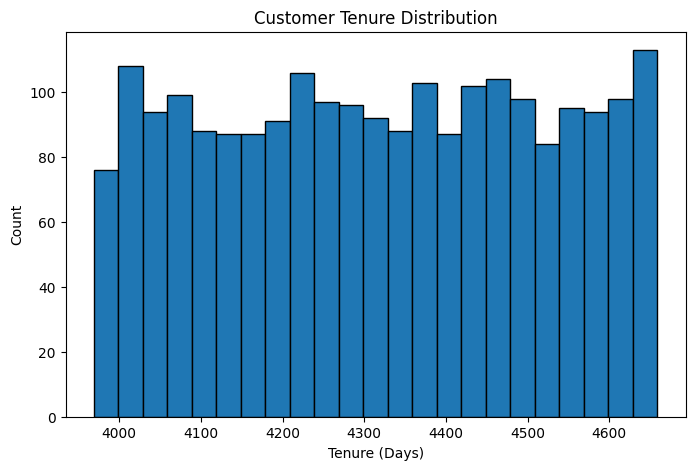

In [12]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True)
data['Customer_Tenure_Days'] = (pd.Timestamp.today() - data['Dt_Customer']).dt.days

# Distribution of customer tenure in days

plt.figure(figsize=(8, 5))
plt.hist(data['Customer_Tenure_Days'], bins=range(min(data['Customer_Tenure_Days']), max(data['Customer_Tenure_Days']) + 2, 30), edgecolor='black')
plt.title('Customer Tenure Distribution')
plt.xlabel('Tenure (Days)')
plt.ylabel('Count')
plt.show()

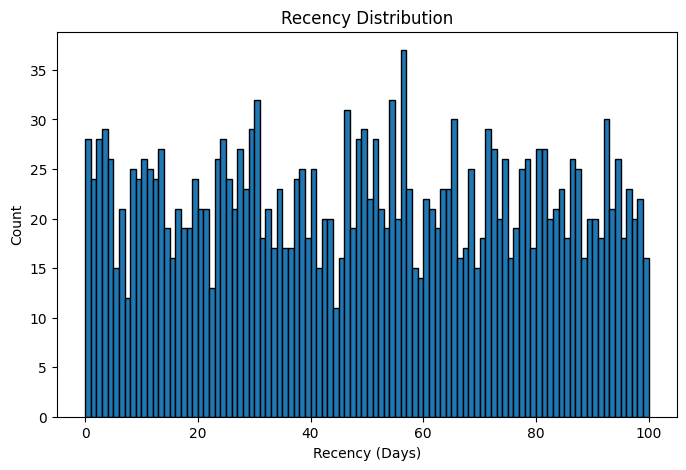

In [14]:
# Recency: The number of days since the last purchase or interaction.

plt.figure(figsize=(8, 5))
plt.hist(data['Recency'], bins=range(min(data['Recency']), max(data['Recency']) + 2), edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency (Days)')
plt.ylabel('Count')
plt.show()

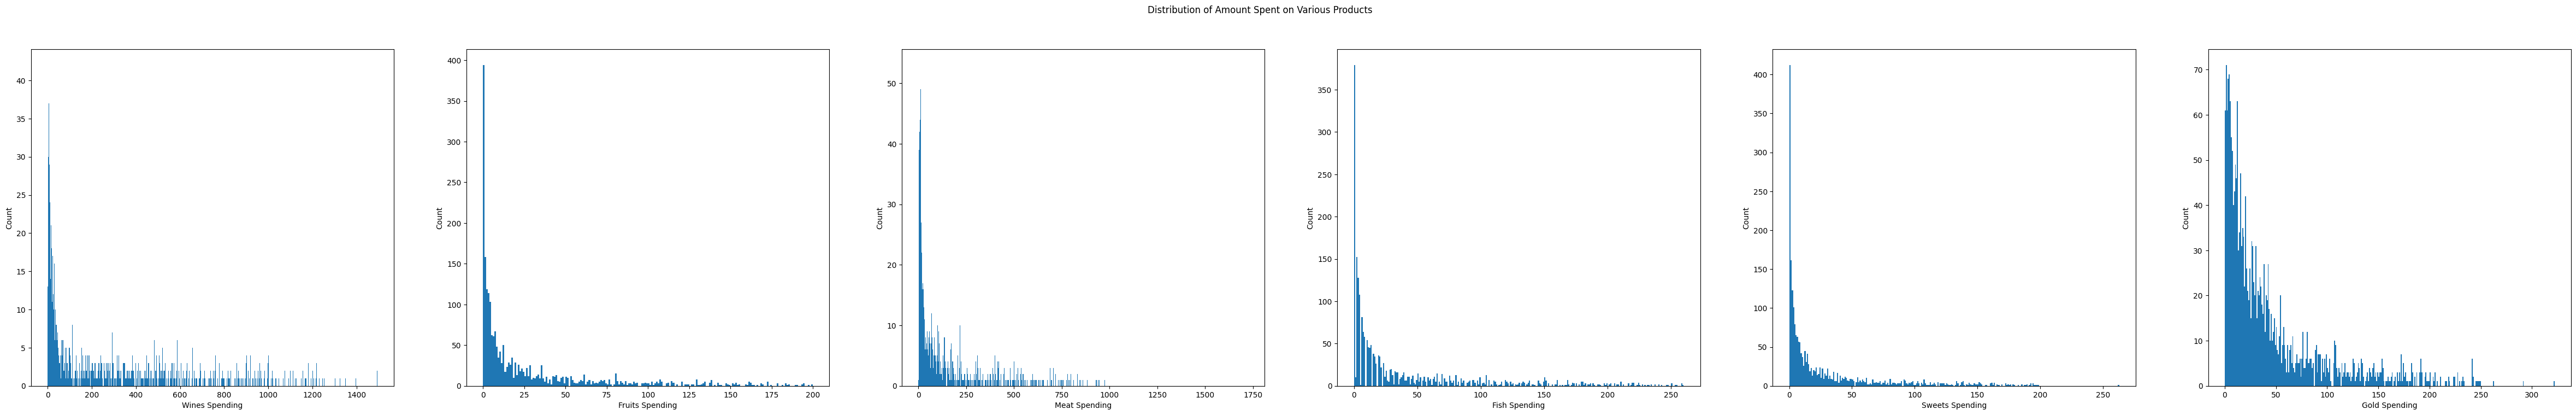

In [21]:
# Distribution of the amount spent on various products

fig, ax = plt.subplots(1, 6, figsize=(60, 8))

ax[0].hist(data['MntWines'], bins=range(min(data['MntWines']), max(data['MntWines']) + 2))
ax[0].set_xlabel('Wines Spending')
ax[0].set_ylabel('Count')

ax[1].hist(data['MntFruits'], bins=range(min(data['MntFruits']), max(data['MntFruits']) + 2))
ax[1].set_xlabel('Fruits Spending')
ax[1].set_ylabel('Count')

ax[2].hist(data['MntMeatProducts'], bins=range(min(data['MntMeatProducts']), max(data['MntMeatProducts']) + 2))
ax[2].set_xlabel('Meat Spending')
ax[2].set_ylabel('Count')

ax[3].hist(data['MntFishProducts'], bins=range(min(data['MntFishProducts']), max(data['MntFishProducts']) + 2))
ax[3].set_xlabel('Fish Spending')
ax[3].set_ylabel('Count')

ax[4].hist(data['MntSweetProducts'], bins=range(min(data['MntSweetProducts']), max(data['MntSweetProducts']) + 2))
ax[4].set_xlabel('Sweets Spending')
ax[4].set_ylabel('Count')

ax[5].hist(data['MntGoldProds'], bins=range(min(data['MntGoldProds']), max(data['MntGoldProds']) + 2))
ax[5].set_xlabel('Gold Spending')
ax[5].set_ylabel('Count')


fig.suptitle('Distribution of Amount Spent on Various Products')

plt.show()

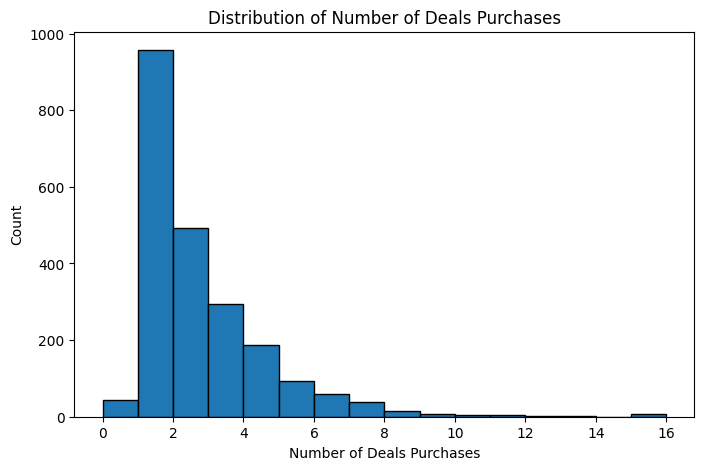

In [22]:
# NumDealsPurchases: The number of purchases made with a discount or as part of a deal.

plt.figure(figsize=(8, 5))
plt.hist(data['NumDealsPurchases'], bins=range(min(data['NumDealsPurchases']), max(data['NumDealsPurchases']) + 2), edgecolor='black')
plt.title('Distribution of Number of Deals Purchases')
plt.xlabel('Number of Deals Purchases')
plt.ylabel('Count')
plt.show()

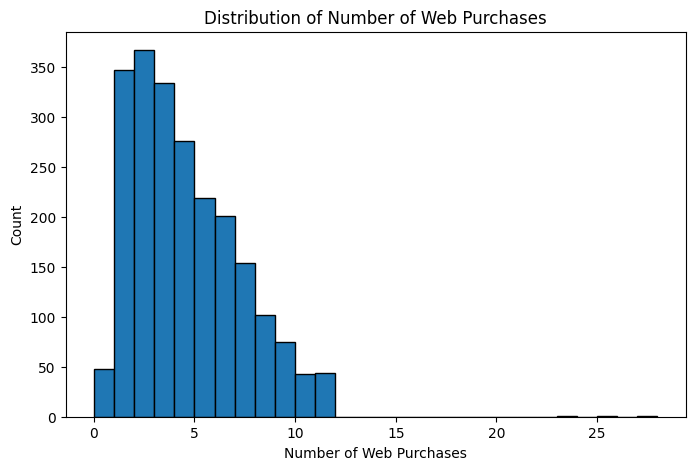

In [23]:
# NumWebPurchases: The number of purchases made through the company's website.

plt.figure(figsize=(8, 5))
plt.hist(data['NumWebPurchases'], bins=range(min(data['NumWebPurchases']), max(data['NumWebPurchases']) + 2), edgecolor='black')
plt.title('Distribution of Number of Web Purchases')
plt.xlabel('Number of Web Purchases')
plt.ylabel('Count')
plt.show()

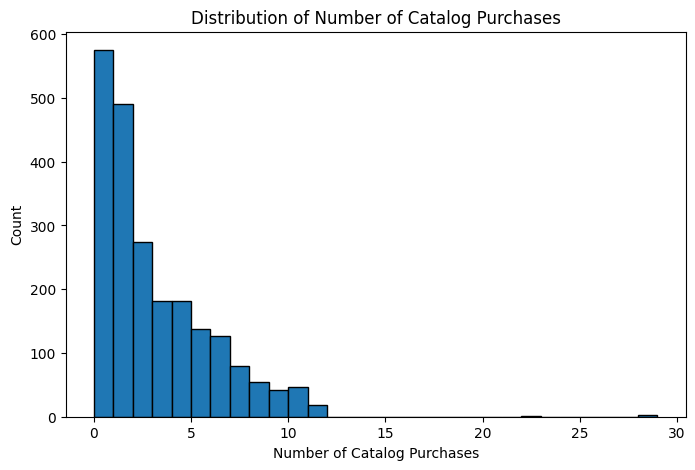

In [24]:
# NumCatalogPurchases: The number of purchases made through catalogs.

plt.figure(figsize=(8, 5))
plt.hist(data['NumCatalogPurchases'], bins=range(min(data['NumCatalogPurchases']), max(data['NumCatalogPurchases']) + 2), edgecolor='black')
plt.title('Distribution of Number of Catalog Purchases')
plt.xlabel('Number of Catalog Purchases')
plt.ylabel('Count')
plt.show()

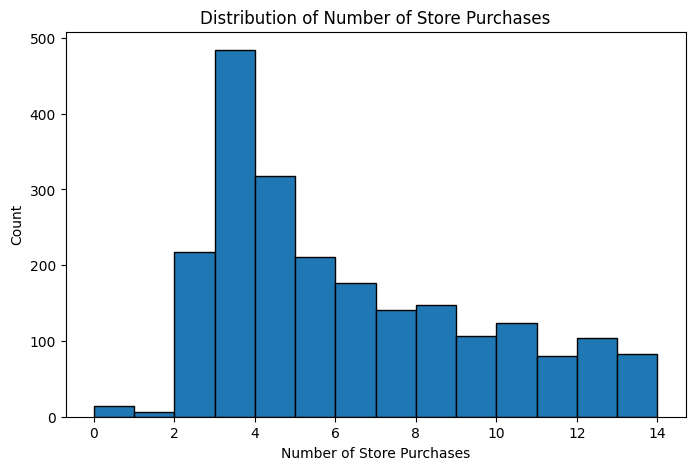

In [25]:
# NumStorePurchases: The number of purchases made in physical stores.

plt.figure(figsize=(8, 5))
plt.hist(data['NumStorePurchases'], bins=range(min(data['NumStorePurchases']), max(data['NumStorePurchases']) + 2), edgecolor='black')
plt.title('Distribution of Number of Store Purchases')
plt.xlabel('Number of Store Purchases')
plt.ylabel('Count')
plt.show()

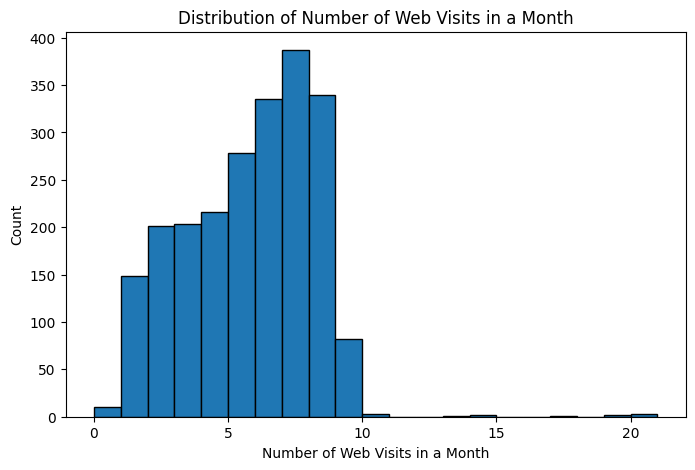

In [26]:
# NumWebVisitsMonth: The number of visits to the company's website in a month.

plt.figure(figsize=(8, 5))
plt.hist(data['NumWebVisitsMonth'], bins=range(min(data['NumWebVisitsMonth']), max(data['NumWebVisitsMonth']) + 2), edgecolor='black')
plt.title('Distribution of Number of Web Visits in a Month')
plt.xlabel('Number of Web Visits in a Month')
plt.ylabel('Count')
plt.show()

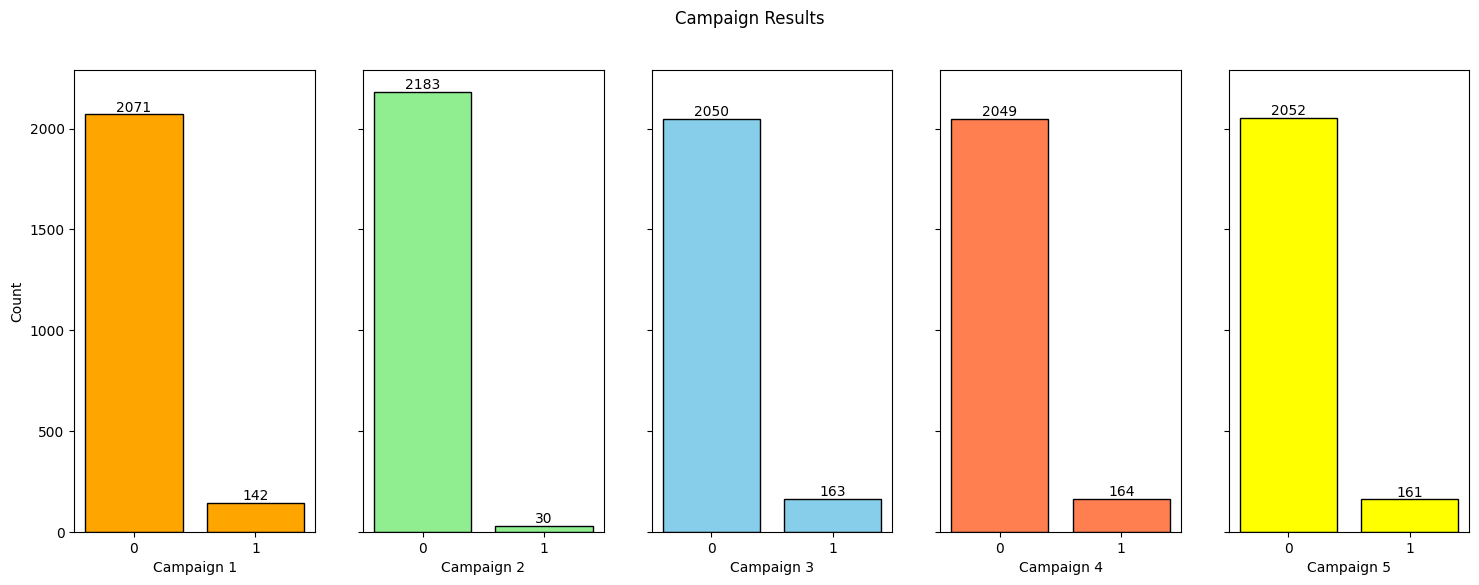

In [27]:
# View 5 compaign results, 1 means accepted, 0 means rejected

fig, ax = plt.subplots(1, 5, figsize=(18, 6), sharey=True)

cmp1_counts = data['AcceptedCmp1'].value_counts()
bars = ax[0].bar(cmp1_counts.index.astype(str), cmp1_counts.values, color='orange', edgecolor='black')
ax[0].set_xlabel('Campaign 1')
ax[0].bar_label(bars)

cmp2_counts = data['AcceptedCmp2'].value_counts()
bars = ax[1].bar(cmp2_counts.index.astype(str), cmp2_counts.values, color='lightgreen', edgecolor='black')
ax[1].set_xlabel('Campaign 2')
ax[1].bar_label(bars)

cmp3_counts = data['AcceptedCmp3'].value_counts()
bars = ax[2].bar(cmp3_counts.index.astype(str), cmp3_counts.values, color='skyblue', edgecolor='black')
ax[2].set_xlabel('Campaign 3')
ax[2].bar_label(bars)

cmp4_counts = data['AcceptedCmp4'].value_counts()
bars = ax[3].bar(cmp4_counts.index.astype(str), cmp4_counts.values, color='coral', edgecolor='black')
ax[3].set_xlabel('Campaign 4')
ax[3].bar_label(bars)

cmp5_counts = data['AcceptedCmp5'].value_counts()
bars = ax[4].bar(cmp5_counts.index.astype(str), cmp5_counts.values, color='yellow', edgecolor='black')
ax[4].set_xlabel('Campaign 5')
ax[4].bar_label(bars)

fig.suptitle('Campaign Results')
ax[0].set_ylabel('Count')

plt.show()

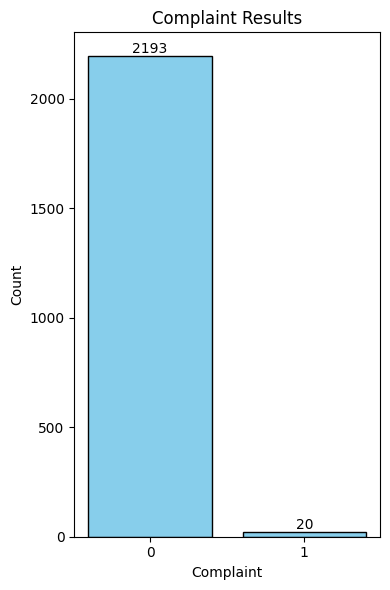

In [36]:
# Complain: Binary indicator (1 or 0) whether the individual has made a complaint.

complain_counts = data['Complain'].value_counts()

plt.figure(figsize=(4, 6))
bars = plt.bar(complain_counts.index.astype(str), complain_counts.values, color='skyblue', edgecolor='black')
plt.bar_label(bars)

plt.title('Complaint Results')
plt.xlabel('Complaint')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

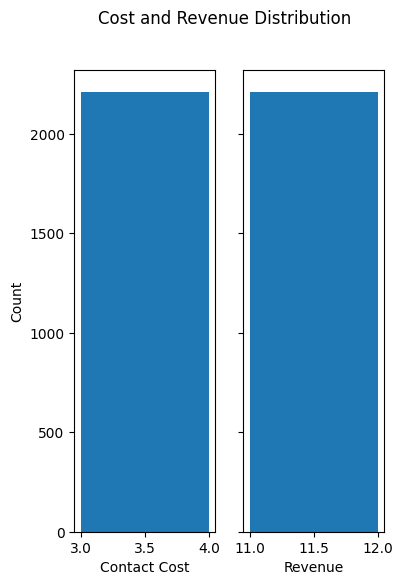

In [39]:
# Z_CostContact: A constant cost associated with contacting a customer.
# Z_Revenue: A constant revenue associated with a successful campaign response.

fig, ax = plt.subplots(1, 2, figsize=(4, 6), sharey=True)

ax[0].hist(data['Z_CostContact'], bins=range(min(data['Z_CostContact']), max(data['Z_CostContact']) + 2))
ax[0].set_xlabel('Contact Cost')

ax[1].hist(data['Z_Revenue'], bins=range(min(data['Z_Revenue']), max(data['Z_Revenue']) + 2))
ax[1].set_xlabel('Revenue')

fig.suptitle('Cost and Revenue Distribution')
ax[0].set_ylabel('Count')

plt.show()

Cost & Revenue seem to be the same for all customers.

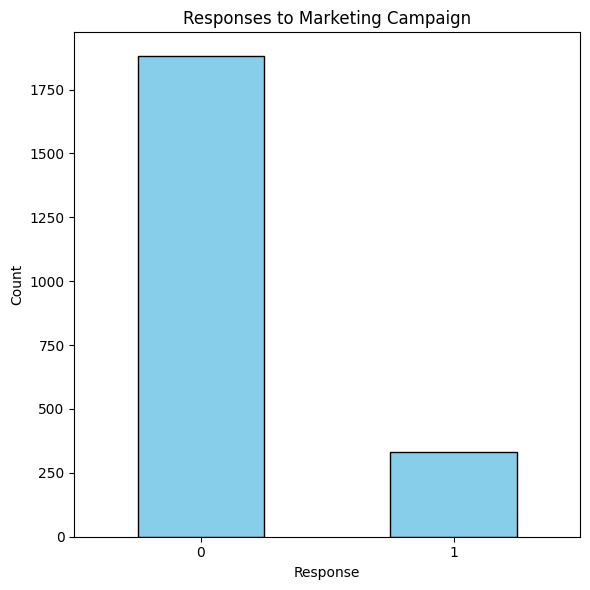

In [41]:
# Response: Binary indicator (1 or 0) whether the individual responded to the marketing campaign.

responses = data['Response'].value_counts()

plt.figure(figsize=(6, 6))
responses.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Responses to Marketing Campaign')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<b>Summrary:</b>

1. There are 2240 records and 29 features for the given dataset.
2. There are 24 missing values in the Income column.
3. Some outliers are detected when checking the values in Year_Birth column.
4. In the past 5 marketing campaigns, most customers tend to reject them instead of accepting them.
5. Very few customers made a complaint.
6. Z_CostContact and Z_Revenue are constant values for all customers.
